<center><h2>A Driven Oscillator</h2></center>

""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased).
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2020. 
    Please respect copyright & acknowledge our work."""
    <p>
DrivenOsc.py:  Driven Oscillator with Mathplotlib

In [6]:
# DrivenOsc.py Driven Oscillator with Mathplotlib

import numpy as np
import matplotlib.pyplot as plt
# from rk4Algor import rk4Algor # if routine in same directory

F=1; m=1;  mu=0.001; omegaF=2; k=1  # Constants                              
omega0=np.sqrt(k/m)                # Natural frequency 
tt=np.zeros((10000),float); yPlot=np.zeros((10000),float)  # Init          

In [7]:
def rk4Algor(t, h, N, y, f):
    k1 = np.zeros(N); k2 = np.zeros(N); k3 = np.zeros(N); k4 = np.zeros(N);
    k1 = h*f(t,y)                             
    k2 = h*f(t+h/2.,y+k1/2.)
    k3= h*f(t+h/2.,y+k2/2.)
    k4= h*f(t+h,y+k3)
    y=y+(k1+2*(k2+k3)+k4)/6.
    return y    

In [ ]:
def f(t,y):                      # RHS force function
    freturn = np.zeros(2)            # Set up 2D array       
    freturn[0] = y[1]
    freturn[1] = 0.1*np.cos(omegaF*t)/m-mu*y[1]/m-omega0**2*y[0]
    return freturn

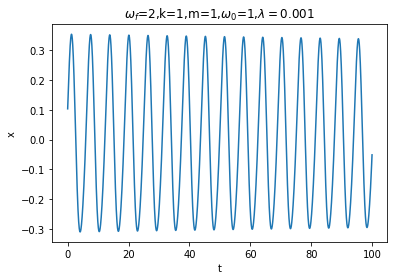

In [9]:
y = np.zeros(2)    # Set up 2D array
y[0] = 0.1     # initial conditions:x
y[1] = 0.3     # init cond speed
f(0,y)         # call function for t=0 with init conds.
dt = 0.01
i = 0

for t in np.arange(0,100,dt):    
    tt[i] = t
    y = rk4Algor(t,dt,2, y, f)    # call runge kutta   
    yPlot[i]=y[0]         # can change to yy[i]=y[1] to plot velocity
    i = i+1
    
plt.figure()
plt.plot(tt,yPlot) 
plt.title('$\omega_f$=2,k=1,m=1,$\omega_0$=1,$\lambda = 0.001$')  
plt.xlabel('t')
plt.ylabel('x')
plt.show()